# Fit a polynomial to the point cloud obtained from the experiments




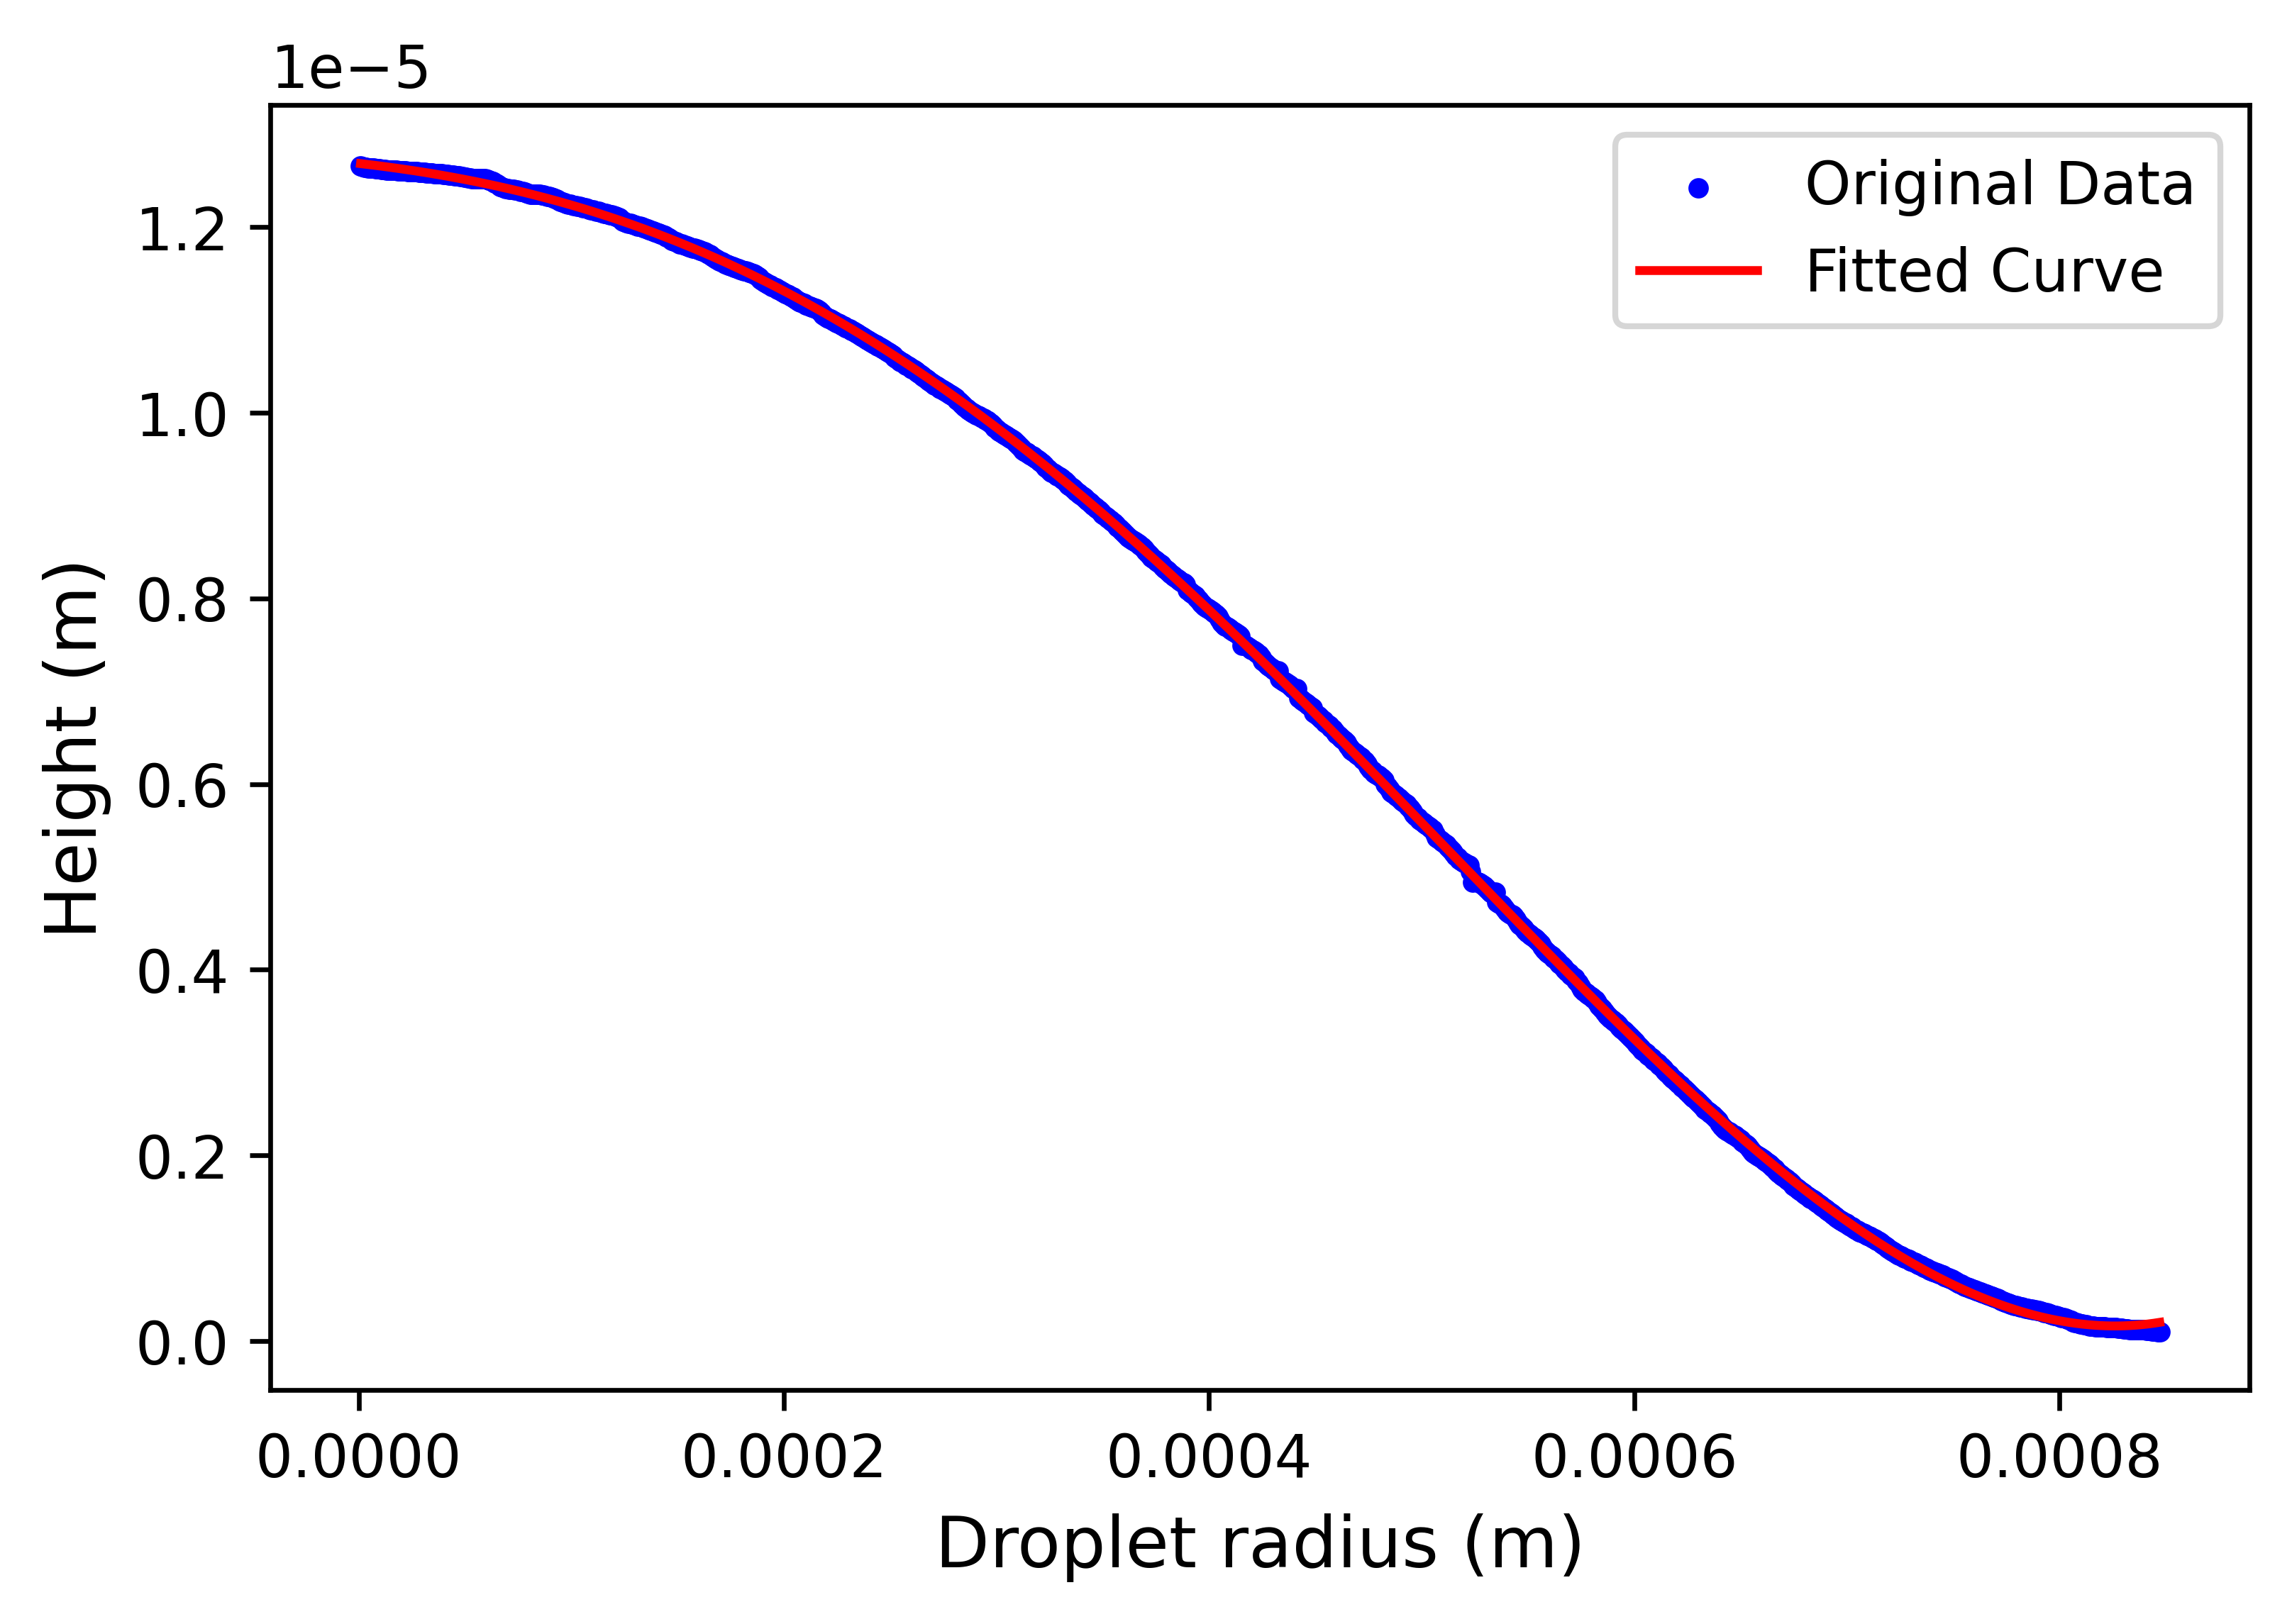

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
rcParams["figure.dpi"] = 600
plt.rcParams['savefig.dpi'] = 600

# Load the data into a Pandas DataFrame
df = pd.read_csv("experiment.csv")

# Extract the x and y columns as a numpy array
X = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

# Define the degree of the polynomial to fit
degree = 4

# Generate polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial curve to the data
reg = LinearRegression()
reg.fit(X_poly, y)

# Generate the curve points for n equally spaced points in x
n = 300
x_new = np.linspace(X.min(), X.max(), n)
X_new_poly = poly_features.transform(x_new.reshape(-1, 1))
y_new = reg.predict(X_new_poly)

# Output the curve points to a csv file
df_new = pd.DataFrame({'x': x_new, 'y': y_new.flatten()})
df_new.to_csv("fit.csv", index=False)

# Plot the original data and the curve
plt.scatter(X, y, color='blue', label='Original Data',s=6)
plt.plot(x_new, y_new, color='red', label='Fitted Curve',markersize=6)
#plt.scatter(x_new, y_new, color='green', label='Points on Curve',s=6)

plt.ylabel(r"Height (m)" ,fontsize=12)
plt.xlabel(r'Droplet radius (m)',fontsize=12)
plt.legend()
plt.show()